Зайцев А.Д. ИУ5-62Б
РК1

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
ds = pd.read_csv('googleplaystore.csv',sep=',')

In [5]:
ds.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [6]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [7]:
ds.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [8]:
#Заполним пропуски в рейтинге
from sklearn.impute import SimpleImputer

ratings = ds[['Rating']]

imp_mean = SimpleImputer(missing_values=np.nan, strategy='median')
imp_mean.fit(ratings)
ratings = imp_mean.transform(ratings)
print(np.unique(ratings))


ds['Rating'] = list(map(lambda x : 5 if x>5 else x[0], ratings))
ratings = ds['Rating']
print(np.unique(ratings))


[ 1.   1.2  1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5
  2.6  2.7  2.8  2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9
  4.   4.1  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.  19. ]
[1.  1.2 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9
 3.  3.1 3.2 3.3 3.4 3.5 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7
 4.8 4.9 5. ]


In [9]:
ds = ds.dropna()


In [10]:
ds.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,10829.0,4.20651,0.480467,1.0,4.1,4.3,4.5,5.0


Для проведения корреляционного анализа приведем всё к численным типам

In [11]:
#Кол-во установок
unique_installs = np.unique(ds['Installs'])
unique_installs

array(['0+', '1+', '1,000+', '1,000,000+', '1,000,000,000+', '10+',
       '10,000+', '10,000,000+', '100+', '100,000+', '100,000,000+', '5+',
       '5,000+', '5,000,000+', '50+', '50,000+', '50,000,000+', '500+',
       '500,000+', '500,000,000+'], dtype=object)

In [12]:
#Приведем из строки в число с помощью map и функции преобразования
def installs_to_int(install):
    if install == "0":
        return 0
    else:
        return int(float(''.join(install[:-1].split(','))))
ds["Installs"] = list(map(installs_to_int,ds["Installs"]))
np.unique(ds['Installs'])

array([         0,          1,          5,         10,         50,
              100,        500,       1000,       5000,      10000,
            50000,     100000,     500000,    1000000,    5000000,
         10000000,   50000000,  100000000,  500000000, 1000000000],
      dtype=int64)

In [13]:
ut = np.unique(ds['Type'])
ut

array(['Free', 'Paid'], dtype=object)

In [14]:
#Приведем столбец тип 

ds['Type'] = list(map(lambda x: True if x == "Free" else False,ds['Type']))
np.unique(ds['Type'])
ds.rename(columns={'Type': 'IsFree'}, inplace=True)
ds['IsFree']

0        True
1        True
2        True
3        True
4        True
         ... 
10836    True
10837    True
10838    True
10839    True
10840    True
Name: IsFree, Length: 10829, dtype: bool

In [15]:
up = np.unique(ds['Price'])
up


array(['$0.99', '$1.00', '$1.04', '$1.20', '$1.26', '$1.29', '$1.49',
       '$1.50', '$1.59', '$1.61', '$1.70', '$1.75', '$1.76', '$1.96',
       '$1.97', '$1.99', '$10.00', '$10.99', '$109.99', '$11.99',
       '$12.99', '$13.99', '$14.00', '$14.99', '$15.46', '$15.99',
       '$154.99', '$16.99', '$17.99', '$18.99', '$19.40', '$19.90',
       '$19.99', '$2.00', '$2.49', '$2.50', '$2.56', '$2.59', '$2.60',
       '$2.90', '$2.95', '$2.99', '$200.00', '$24.99', '$25.99', '$28.99',
       '$29.99', '$299.99', '$3.02', '$3.04', '$3.08', '$3.28', '$3.49',
       '$3.61', '$3.88', '$3.90', '$3.95', '$3.99', '$30.99', '$33.99',
       '$37.99', '$379.99', '$389.99', '$39.99', '$394.99', '$399.99',
       '$4.29', '$4.49', '$4.59', '$4.60', '$4.77', '$4.80', '$4.84',
       '$4.85', '$4.99', '$400.00', '$46.99', '$5.00', '$5.49', '$5.99',
       '$6.49', '$6.99', '$7.49', '$7.99', '$74.99', '$79.99', '$8.49',
       '$8.99', '$89.99', '$9.00', '$9.99', '0'], dtype=object)

In [16]:
def price_to_float(price):
    if(price != '0'):
        result = float(''.join(price[1:]))
        return result
    else:
        return 0.0
ds['Price'] = list(map(price_to_float,ds['Price']))
up = np.unique(ds['Price'])
up

array([  0.  ,   0.99,   1.  ,   1.04,   1.2 ,   1.26,   1.29,   1.49,
         1.5 ,   1.59,   1.61,   1.7 ,   1.75,   1.76,   1.96,   1.97,
         1.99,   2.  ,   2.49,   2.5 ,   2.56,   2.59,   2.6 ,   2.9 ,
         2.95,   2.99,   3.02,   3.04,   3.08,   3.28,   3.49,   3.61,
         3.88,   3.9 ,   3.95,   3.99,   4.29,   4.49,   4.59,   4.6 ,
         4.77,   4.8 ,   4.84,   4.85,   4.99,   5.  ,   5.49,   5.99,
         6.49,   6.99,   7.49,   7.99,   8.49,   8.99,   9.  ,   9.99,
        10.  ,  10.99,  11.99,  12.99,  13.99,  14.  ,  14.99,  15.46,
        15.99,  16.99,  17.99,  18.99,  19.4 ,  19.9 ,  19.99,  24.99,
        25.99,  28.99,  29.99,  30.99,  33.99,  37.99,  39.99,  46.99,
        74.99,  79.99,  89.99, 109.99, 154.99, 200.  , 299.99, 379.99,
       389.99, 394.99, 399.99, 400.  ])

In [17]:

us = np.unique(ds['Size'])
print(us)
ds = ds.drop(ds[ds['Size'] == 'Varies with device'].index)
us = np.unique(ds['Size'])
print(us)

['1.0M' '1.1M' '1.2M' '1.3M' '1.4M' '1.5M' '1.6M' '1.7M' '1.8M' '1.9M'
 '10.0M' '100M' '1020k' '103k' '108k' '10M' '116k' '118k' '11M' '121k'
 '122k' '12M' '13M' '141k' '143k' '144k' '14M' '14k' '153k' '154k' '157k'
 '15M' '160k' '161k' '164k' '169k' '16M' '170k' '172k' '173k' '175k'
 '176k' '17M' '17k' '186k' '18M' '18k' '190k' '191k' '192k' '193k' '196k'
 '19M' '2.0M' '2.1M' '2.2M' '2.3M' '2.4M' '2.5M' '2.6M' '2.7M' '2.8M'
 '2.9M' '200k' '201k' '203k' '206k' '208k' '209k' '20M' '20k' '210k'
 '219k' '21M' '220k' '221k' '226k' '228k' '22M' '232k' '234k' '238k'
 '239k' '23M' '23k' '240k' '241k' '243k' '245k' '246k' '24M' '24k' '251k'
 '253k' '257k' '259k' '25M' '25k' '266k' '269k' '26M' '26k' '270k' '27M'
 '27k' '280k' '283k' '288k' '28M' '28k' '292k' '293k' '29M' '29k' '3.0M'
 '3.1M' '3.2M' '3.3M' '3.4M' '3.5M' '3.6M' '3.7M' '3.8M' '3.9M' '306k'
 '308k' '309k' '30M' '313k' '314k' '317k' '318k' '319k' '31M' '322k'
 '323k' '329k' '32M' '334k' '335k' '33M' '33k' '34M' '34k' '350k' '351k'


In [18]:
#Преобразуем к одной величине
def size_to_kbytes(size):
    if size[-1] == "M":
        return int(float(size[:-1])) * 1000
    else:
        return  int(float(size[:-1]))
ds['Size'] = list(map(size_to_kbytes,ds['Size']))
us = np.unique(ds['Size'])
print(us)


[     8     14     17     18     20     23     24     25     26     27
     28     29     33     34     39     41     44     45     48     50
     51     54     55     58     61     67     70     72     73     74
     78     79     81     82     89     91     93     97    103    108
    116    118    121    122    141    143    144    153    154    157
    160    161    164    169    170    172    173    175    176    186
    190    191    192    193    196    200    201    203    206    208
    209    210    219    220    221    226    228    232    234    238
    239    240    241    243    245    246    251    253    257    259
    266    269    270    280    283    288    292    293    306    308
    309    313    314    317    318    319    322    323    329    334
    335    350    351    353    364    371    373    375    376    378
    383    387    400    404    411    412    414    417    420    421
    429    430    437    442    444    454    458    459    460    467
    47

In [19]:
ds['Reviews'] = ds['Reviews'].apply(int)

In [20]:
uav = np.unique(ds['Android Ver'])
print(uav)

['1.0 and up' '1.5 and up' '1.6 and up' '2.0 and up' '2.0.1 and up'
 '2.1 and up' '2.2 - 7.1.1' '2.2 and up' '2.3 and up' '2.3.3 and up'
 '3.0 and up' '3.1 and up' '3.2 and up' '4.0 and up' '4.0.3 - 7.1.1'
 '4.0.3 and up' '4.1 - 7.1.1' '4.1 and up' '4.2 and up' '4.3 and up'
 '4.4 and up' '4.4W and up' '5.0 - 6.0' '5.0 - 7.1.1' '5.0 - 8.0'
 '5.0 and up' '5.1 and up' '6.0 and up' '7.0 - 7.1.1' '7.0 and up'
 '7.1 and up' '8.0 and up' 'Varies with device']


In [21]:
ds = ds.drop(ds[ds['Android Ver'] == 'Varies with device'].index)
uav = np.unique(ds['Android Ver'])
print(uav)

['1.0 and up' '1.5 and up' '1.6 and up' '2.0 and up' '2.0.1 and up'
 '2.1 and up' '2.2 - 7.1.1' '2.2 and up' '2.3 and up' '2.3.3 and up'
 '3.0 and up' '3.1 and up' '3.2 and up' '4.0 and up' '4.0.3 - 7.1.1'
 '4.0.3 and up' '4.1 - 7.1.1' '4.1 and up' '4.2 and up' '4.3 and up'
 '4.4 and up' '4.4W and up' '5.0 - 6.0' '5.0 - 7.1.1' '5.0 - 8.0'
 '5.0 and up' '5.1 and up' '6.0 and up' '7.0 - 7.1.1' '7.0 and up'
 '7.1 and up' '8.0 and up']


In [22]:
def version(anver):
    if '-' in anver:
        return float(anver.split(' ')[-1][:3])
    else:
        return float(anver.split(' ')[0][:3])

ds['Android Ver'] = list(map(version,ds['Android Ver']))
uav = np.unique(ds['Android Ver'])
print(uav)

[1.  1.5 1.6 2.  2.1 2.2 2.3 3.  3.1 3.2 4.  4.1 4.2 4.3 4.4 5.  5.1 6.
 7.  7.1 8. ]


<AxesSubplot: >

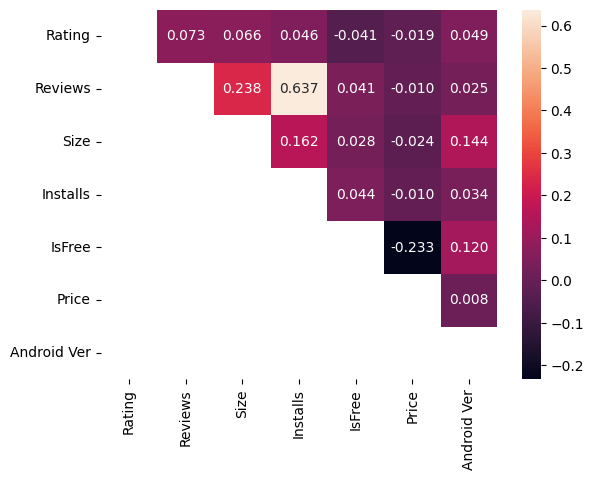

In [23]:
mask = np.zeros_like(ds.corr(numeric_only=True), dtype=bool)
mask[np.tril_indices_from(mask)] = True
sns.heatmap(ds.corr(numeric_only=True), mask=mask, annot=True, fmt='.3f')

Видно что корреллируют кол-во скачиваний и кол-во отзывов, но это и очевидно. Также зависят кол-во скачиваний и размер приложения, из этого следует, что приложения в которые вложили больше сил и времени пользуются спросом.

<AxesSubplot: xlabel='Rating', ylabel='Density'>

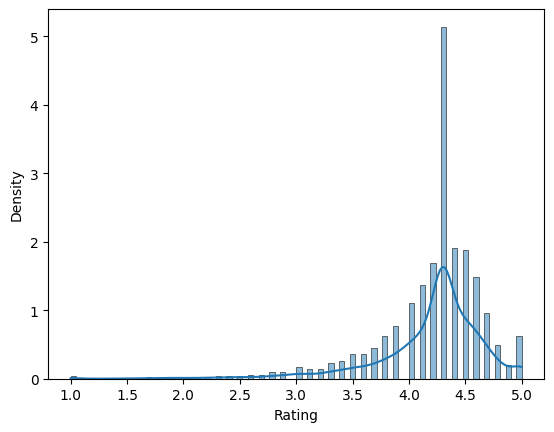

In [24]:
sns.histplot(ds['Rating'], kde=True, stat='density')